In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = load_iris()

In [3]:
data = pd.DataFrame(df.data, columns = df.feature_names)

In [4]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
dataa = data.drop(['sepal length (cm)','sepal width (cm)'],axis=1)

In [7]:
dataa.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [8]:
from sklearn.cluster import KMeans

In [9]:
km = KMeans(n_clusters=3)

In [10]:
km

KMeans(n_clusters=3)

In [14]:
d = km.fit_predict(dataa)

In [120]:
d

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [121]:
dataa['cluster'] = d

In [17]:
dataa.head()

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


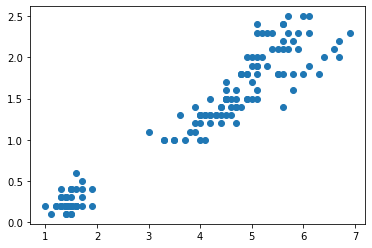

In [21]:
plt.scatter(dataa['petal length (cm)'],dataa['petal width (cm)'])

In [23]:
df1 = dataa[dataa.cluster==0]
df2 = dataa[dataa.cluster==1]
df3 = dataa[dataa.cluster==2]

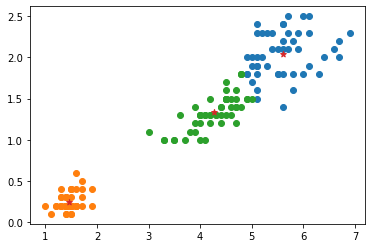

In [87]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'])
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'])
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],marker='*')

In [80]:
km.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [88]:
k = km.fit(dataa)

In [108]:
km = KMeans(n_clusters=k)

In [128]:
sse=[]
rng = range(1,10)
for k in rng:
    km = KMeans(n_clusters=k)
    km.fit(dataa)
    km.inertia_
    sse.append(km.inertia_)

C:\Users\Student\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [125]:
sse

[650.7886666666667,
 186.27970291146764,
 31.371358974358966,
 22.65903143812709,
 14.206793675889331,
 11.412196969696973,
 9.377100925390398,
 7.788416714864081,
 7.049403123192595]

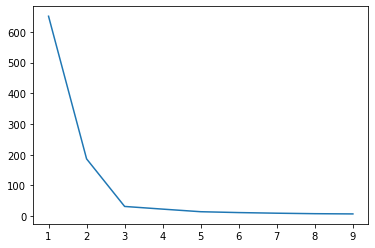

In [126]:
plt.plot(rng,sse)